In [1]:
import numpy as np
import pandas as pd
import pyquantlib as pq
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
from importlib import reload

In [2]:
# question given:
t_list = np.array([6.0, 12.0, 18.0, 24.0]) / 12.0
df_list = np.array([0.9933, 0.9835, 0.9750, 0.9625])
on_r = 0.01

#### Part i

In [3]:
r_list = pq.bonds.zeros_from_df(t_list, df_list)
r_list

array([ 0.01344509,  0.01663764,  0.01687854,  0.01911061])

#### Part ii

In [4]:
# need to add the overnight rate to the lists
t_list_to_solve = np.append(0, t_list)
r_list_to_solve = np.append(on_r, r_list)
print(t_list_to_solve,"\n",r_list_to_solve)

[ 0.   0.5  1.   1.5  2. ] 
 [ 0.01        0.01344509  0.01663764  0.01687854  0.01911061]


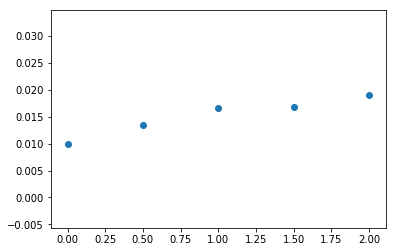

In [5]:
plt.scatter(t_list_to_solve, r_list_to_solve)
plt.show()

In [6]:
a, b, c, d, M, z = pq.interpolate.efficient_cub_spline(t_list_to_solve, r_list_to_solve)

In [7]:
M

array([[ 2. ,  0.5,  0. ],
       [ 0.5,  2. ,  0.5],
       [ 0. ,  0.5,  2. ]])

In [8]:
z

array([-0.0030305 , -0.03541983,  0.02389404])

#### Part iii

In [16]:
solve_t_list = np.array([4.0, 10.0, 16.0, 22.0]) / 12.0
r_sol = {}
for t in solve_t_list:
    r = pq.interpolate.cubic_spline_func(t, t_list_to_solve, a, b, c, d)
    r_sol[t] = r
r_sol

{0.33333333333333331: 0.012230526289506688,
 0.83333333333333337: 0.015878836429111552,
 1.3333333333333333: 0.016810958652562859,
 1.8333333333333333: 0.018147421812852296}

### Checking Interpolation

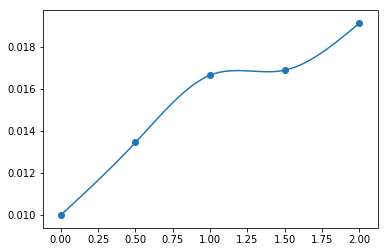

In [17]:
graph_t_list = np.linspace(0, 22, 1000)
graph_sol = []
for t in graph_t_list:
    r = pq.interpolate.cubic_spline_func(t, t_list_to_solve, a, b, c, d)
    graph_sol.append(r)

plt.plot(graph_t_list, graph_sol)
plt.scatter(t_list_to_solve, r_list_to_solve)

plt.show()

#### Part iv

In [18]:
# question given
mat_in_m = 22
cpn_rate = 0.07
freq = 2

In [19]:
t_list, cf_list, df = pq.bonds.gen_t_cf_dataframe(mat_in_m, cpn_rate, freq)
df

,cf
t,
0.333333,3.5
0.833333,3.5
1.333333,3.5
1.833333,103.5


In [20]:
r_list = np.array([])
for t in t_list:
    r = pq.interpolate.cubic_spline_func(t, t_list_to_solve, a, b, c, d)
    r_list = np.append(r_list, r)
r_list

array([ 0.01223053,  0.01587884,  0.01681096,  0.01814742])

In [21]:
df_list = pq.bonds.df_yld(t_list, r_list)
df_list

array([ 0.99593146,  0.9868548 ,  0.97783473,  0.9672771 ])

In [26]:
cf_list

array([   3.5,    3.5,    3.5,  103.5])

In [27]:
px = cf_list.dot(df_list)
px

110.47535278825758

### Checking the bond pricing:

In [28]:
r1 = pq.interpolate.cubic_spline_func(4/12, t_list_to_solve, a, b, c, d)
r2 = pq.interpolate.cubic_spline_func(10/12, t_list_to_solve, a, b, c, d)
r3 = pq.interpolate.cubic_spline_func(16/12, t_list_to_solve, a, b, c, d)
r4 = pq.interpolate.cubic_spline_func(22/12, t_list_to_solve, a, b, c, d)
print(r1, r2, r3, r4)

0.0122305262895 0.0158788364291 0.0168109586526 0.0181474218129


In [29]:
df1 = np.exp(-r1*4/12)
df2 = np.exp(-r2*10/12)
df3 = np.exp(-r3*16/12)
df4 = np.exp(-r4*22/12)
print(df1, df2, df3, df4)

0.995931456942 0.986854799153 0.977834729434 0.967277095062


In [30]:
df1 * 3.5 + df2 * 3.5 + df3 * 3.5 + df4 * 103.5

110.47535278825758